In [20]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import re

#Data Cleanup
df_ecom= pd.read_csv(r"C:\Users\Jesse\OneDrive\Desktop\EcommerceAnalysis2024\files\E-commerece sales data 2024.csv")
delete=df_ecom.columns[4]
df_ecom.drop(labels=delete,axis=1,inplace=True)
df_cust= pd.read_csv(r"C:\Users\Jesse\OneDrive\Desktop\EcommerceAnalysis2024\files\customer_details.csv")
df_prod= pd.read_csv(r"C:\Users\Jesse\OneDrive\Desktop\EcommerceAnalysis2024\files\product_details.csv")
drop_list=df_prod.columns[[2,3,5,6,8,15,17,18,19,20,21,22,23,24,26,27]].to_list()
df_prod.drop(labels=drop_list,axis=1,inplace=True)
df_prod['Selling Price']=df_prod['Selling Price'].replace('[\$,]','',regex=True)
df_prod=df_prod.rename(columns={'Uniqe Id':'Unique Id'})
df_prod['Selling Price']=pd.to_numeric(df_prod['Selling Price'],errors='coerce')
df_prod['Selling Price']=df_prod['Selling Price'].fillna(0).astype(int)
def convert_to_pounds(weight_str):
    # Check if the input is a string
    if isinstance(weight_str, str):
        # Regular expression to match the numeric part and the unit
        match = re.match(r'([\d.]+)\s*(pounds|ounces)', weight_str.strip())
        if match:
            try:
                value = float(match.group(1))
                unit = match.group(2)
                if unit == 'ounces':
                    # Convert ounces to pounds
                    return value * 0.0625
                else:
                    # Already in pounds
                    return value
            except ValueError:
                # Handle conversion errors
                return None
    # Return None for non-string values or invalid formats
    return None
df_prod['Shipping Weight (lbs)']=df_prod['Shipping Weight'].apply(convert_to_pounds)
df_prod.drop(labels='Shipping Weight',axis=1,inplace=True)


<>:17: SyntaxWarning: invalid escape sequence '\$'
<>:17: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Jesse\AppData\Local\Temp\ipykernel_10472\3666726253.py:17: SyntaxWarning: invalid escape sequence '\$'
  df_prod['Selling Price']=df_prod['Selling Price'].replace('[\$,]','',regex=True)


In [21]:
df_prod['Category']=df_prod['Category'].fillna('')
df_prod['CategorySplit']=df_prod['Category'].str.split('|')
df_prod['HeadCategory']=df_prod['CategorySplit'].apply(lambda x:x[0] if isinstance(x, list) and len(x) > 0 else None)
df_prod['HeadCategory']=df_prod['HeadCategory'].str.strip()
df_prod['SubCategory']=df_prod['CategorySplit'].apply(lambda x: '|'.join(x[1:]) if isinstance(x, list) and len(x) > 1 else None)
df_prod.drop(columns=['CategorySplit'], inplace=True)

In [22]:
df_prod['Selling Price']=pd.to_numeric(df_prod['Selling Price'],errors='coerce')
df_prod['Selling Price']=df_prod['Selling Price'].fillna(0).astype(int)

In [23]:
words = ['Toys', 'Games']
contains_words=df_prod['Product Name'].str.contains('|'.join(words),case=False,na=False)
df_prod.loc[(df_prod['HeadCategory'] == '') & contains_words, 'HeadCategory'] = 'Toys & Games'
words2 = ['Clothes','Shoes','Jewelry']
contains_words2=df_prod['Product Name'].str.contains('|'.join(words2),case=False,na=False)
df_prod.loc[(df_prod['HeadCategory'] == '') & contains_words2, 'HeadCategory'] = 'Clothing, Shoes & Jewelry'
words3 = ['Home','Kitchen']
contains_words3=df_prod['Product Name'].str.contains('|'.join(words3),case=False,na=False)
df_prod.loc[(df_prod['HeadCategory'] == '') & contains_words3, 'HeadCategory'] = 'Home & Kitchen'
words4 = ['Sports']
contains_words4=df_prod['Product Name'].str.contains('|'.join(words4),case=False,na=False)
df_prod.loc[(df_prod['HeadCategory'] == '') & contains_words4, 'HeadCategory'] = 'Sports & Outdoors'
words5 = ['Patio','Lawn','Garden']
contains_words5=df_prod['Product Name'].str.contains('|'.join(words5),case=False,na=False)
df_prod.loc[(df_prod['HeadCategory'] == '') & contains_words5, 'HeadCategory'] = 'Patio, Lawn & Garden'

df_prod['HeadCategory']=df_prod['HeadCategory'].replace('','Unique')


Text(0.5, 0, 'Total Price for Units Sold')

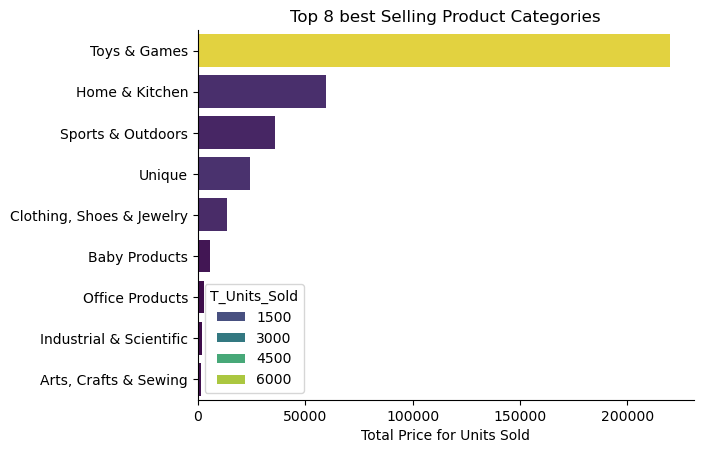

In [47]:
CategorySales=df_prod.groupby('HeadCategory').agg(T_Selling_Price=('Selling Price','sum'),T_Units_Sold=('Unique Id','size')).sort_values(by='T_Selling_Price',ascending=False).head(9)
sns.barplot(data=CategorySales,y='HeadCategory',x='T_Selling_Price',hue='T_Units_Sold',palette='viridis')
sns.despine()
plt.title('Top 8 best Selling Product Categories',loc='center')
plt.ylabel('')
plt.xlabel('Total Price for Units Sold')


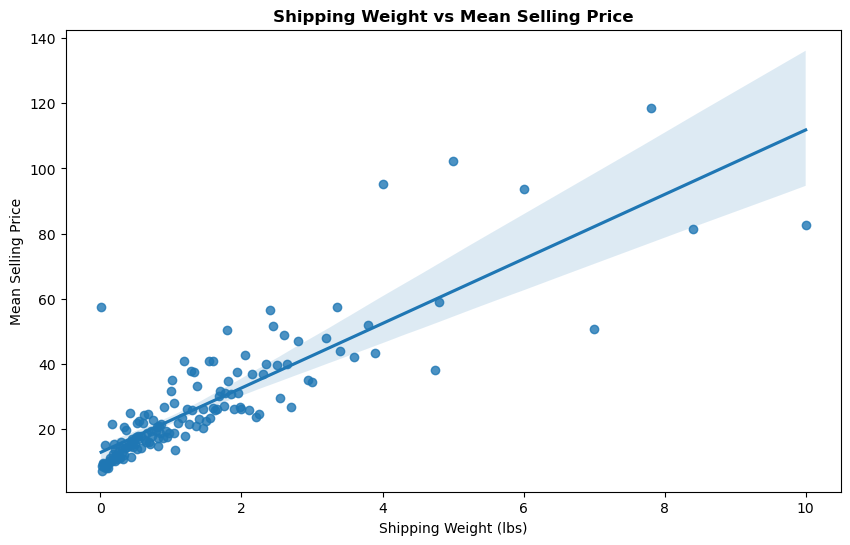

In [26]:
weight_distr=df_prod.groupby('Shipping Weight (lbs)').agg(T_Selling_Price=('Selling Price','sum'),M_Selling_Price=('Selling Price','mean'),Count=('Shipping Weight (lbs)','count')).sort_values(by='Count',ascending=False)
weight_distr=weight_distr[weight_distr['Count']>10].reset_index()
weight_distr.sort_values(by='M_Selling_Price',ascending=False)

plt.figure(figsize=(10,6))
sns.regplot(y='M_Selling_Price',x='Shipping Weight (lbs)',data=weight_distr)
plt.title('Shipping Weight vs Mean Selling Price',fontweight='bold')
plt.xlabel('Shipping Weight (lbs)')
plt.ylabel('Mean Selling Price')
plt.show()

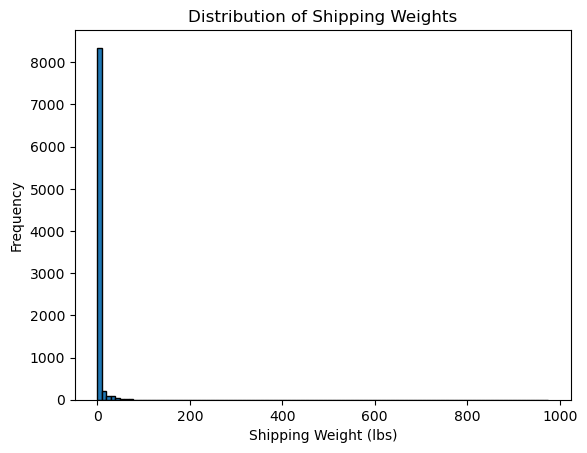

In [27]:

plt.hist(df_prod['Shipping Weight (lbs)'].dropna(), bins=100, edgecolor='k')
plt.xlabel('Shipping Weight (lbs)')
plt.ylabel('Frequency')
plt.title('Distribution of Shipping Weights')
plt.show()
